In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-details-dataset/housing.csv


toc_markdown = """
# Table of Contents
1. [Import Libraries](#1-import-libraries)
2. [Understanding the Data](#2-understanding-the-data)
2. [Data Cleaning or EDA](#21-data-cleaning-or-eda)
3. [Data Analysis](#3-data-analysis)
4. [Add machine learning model](#4-add-machine-learning-models-for-perdiction)
5. [Modeling](#5-modeling)
5. [Leanier Regrassion](#51-linear-regression)
5. [Random Forest](#52-random-forest)
5. [Mean Squared error](#53-mean-squared-error)
6. [Actual VS predict plot](#6-actuval-vs-predict-plot)
7. [Summary output](#7-summary-output)
8. [Detail](#8-details)
9. [summary of the housing dataset](#summary-of-the-housing-dataset)
10. [common Q&A](#10-common-questions--answers)


# Insert the table of contents
from IPython.display import display, Markdown
display(Markdown(toc_markdown))

In [3]:
df = pd.read_csv('/kaggle/input/housing-details-dataset/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


![kaggle](https://ik.imagekit.io/14sfaswy6hrz/images/clyb48mudtgum1gmw69y81zg3.jpg)

In [4]:
from IPython.display import display, HTML

# Hide this cell by setting background using JS injected via HTML + auto-delete itself
display(HTML("""
<script>
let cell = this.closest('.cell') || this.closest('.jp-Cell');
if(cell){
    let editor = cell.querySelector('.input_area') || cell.querySelector('.jp-InputArea');
    if(editor){
        editor.style.background = 'lightgreen';
    }
    cell.style.display = 'none';  // Hide this setup cell
}
</script>
"""))


### 1. import libraires

In [5]:
#import libraires
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
from IPython.display import display, HTML

display(HTML("""
<script>
let all_cells = document.querySelectorAll('.cell, .jp-Cell');
all_cells.forEach(cell => {
    let editor = cell.querySelector('.input_area') || cell.querySelector('.jp-InputArea');
    if(editor){
        editor.style.background = 'lightgreen';
    }
});
let current = this.closest('.cell, .jp-Cell');
if(current){ current.style.display = 'none'; }
</script>
"""))


### 2. Understanding the data

In [7]:
df.info()
df.describe().T
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


(20640, 9)

### 2.1 data cleaning or EDA


1. what is data cleaning?
ans) Data cleaning is used to clean the data if there is having any missing or values or require to clean the data like convert col[1] and col[2] in to float.
2. What is EDA?
ans) EDA stands for Explotary Data analysis. It is a critical step in data science and analytics where you analyze datasets to summarize their main characteristics, often using visual methods and statistical techniques.

Key Goals of EDA:
Understand the Data – Discover patterns, trends, and relationships.

Detect Anomalies – Identify outliers, missing values, or errors.

Check Assumptions – Validate hypotheses about the data.

Guide Feature Selection – Help decide which variables are important for modeling.

Common EDA Techniques:
✔ Descriptive Statistics – Mean, median, mode, variance.
✔ Data Visualization – Histograms, box plots, scatter plots.
✔ Correlation Analysis – Checking relationships between variables.
✔ Handling Missing Data – Deciding how to treat null values.

Why is EDA Important?
Helps in cleaning data before modeling.

Uncovers hidden insights that can impact decision-making.

Ensures better model performance by understanding data structure.

Example: Before building a machine learning model, you perform EDA to check if some features are irrelevant or if there’s unexpected bias in the dataset.

In [25]:
# Drop rows with any NaNs
df = df.dropna()


### 3. Data analysis

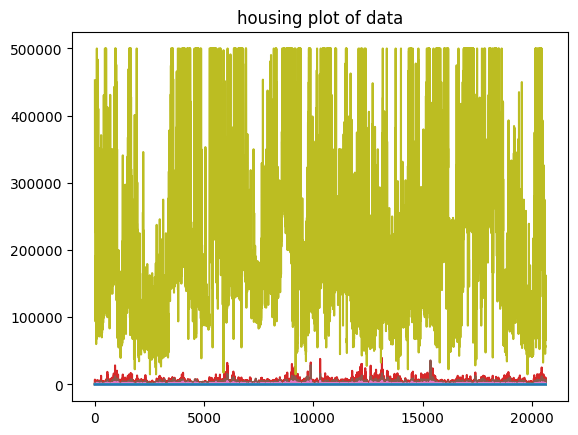

In [26]:
plt.plot(df)
plt.title("housing plot of data")
plt.show()

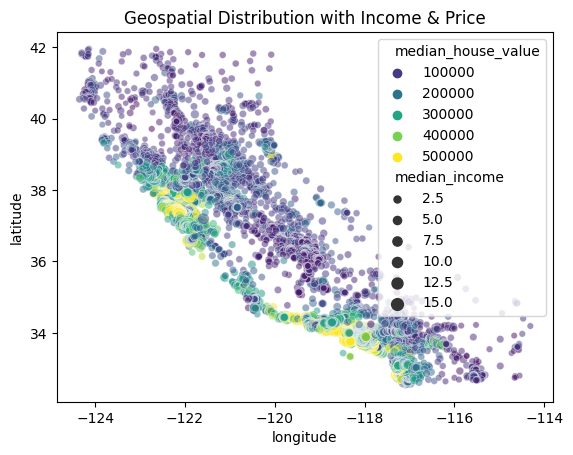

In [27]:
sns.scatterplot(
    x='longitude', y='latitude',
    hue='median_house_value', size='median_income',
    palette='viridis', data=df, alpha=0.5
)
plt.title("Geospatial Distribution with Income & Price")
plt.show()


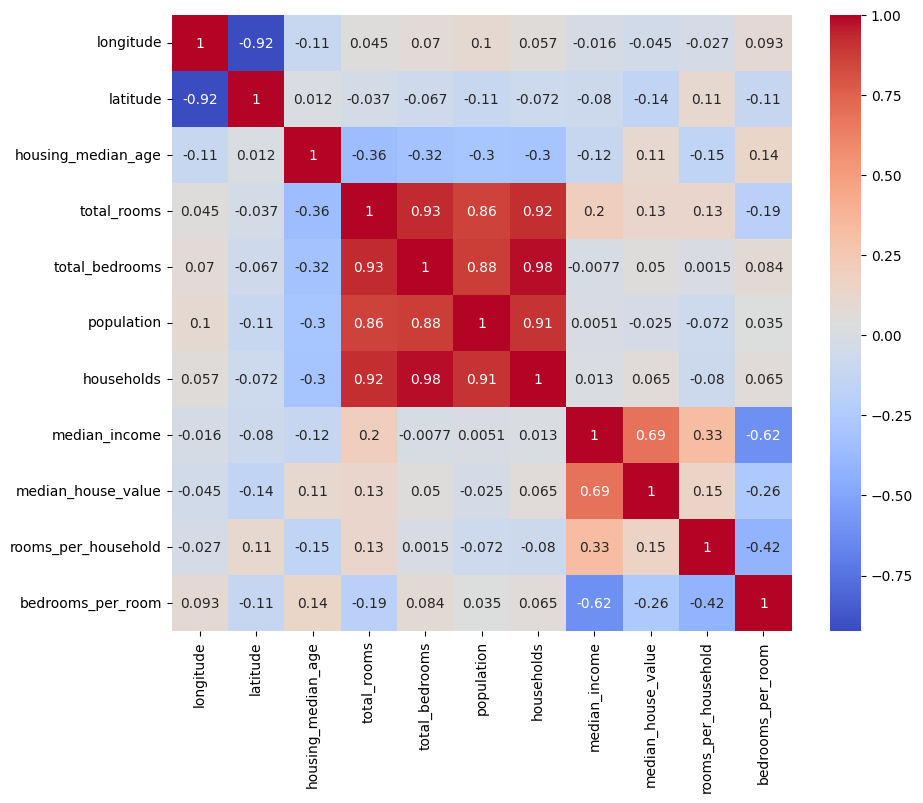

In [28]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### 4. Add machine learning models for perdiction

In [29]:
# Feature Engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']


### 5. Modeling

In [20]:
# Define the correct list of feature columns
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
            'total_bedrooms', 'population', 'households', 'median_income']


In [30]:
# Modeling
features = ['housing_median_age','median_income','rooms_per_household','bedrooms_per_room','population']
X = df[features]
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5.1 Linear regression

In [31]:
# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("LR RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))
print("LR R2:", r2_score(y_test, pred_lr))


LR RMSE: 79007.01970361285
LR R2: 0.5435446697117732


### 5.2 Random forest

In [32]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))
print("RF R2:", r2_score(y_test, pred_rf))


RF RMSE: 73701.25827688792
RF R2: 0.6027931508490114


### 5.3 Mean squared error

In [34]:
# add models
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Root Mean Squared Error (RMSE): 79007.02
R-squared Score: 0.54


### 6. Actuval vs predict plot

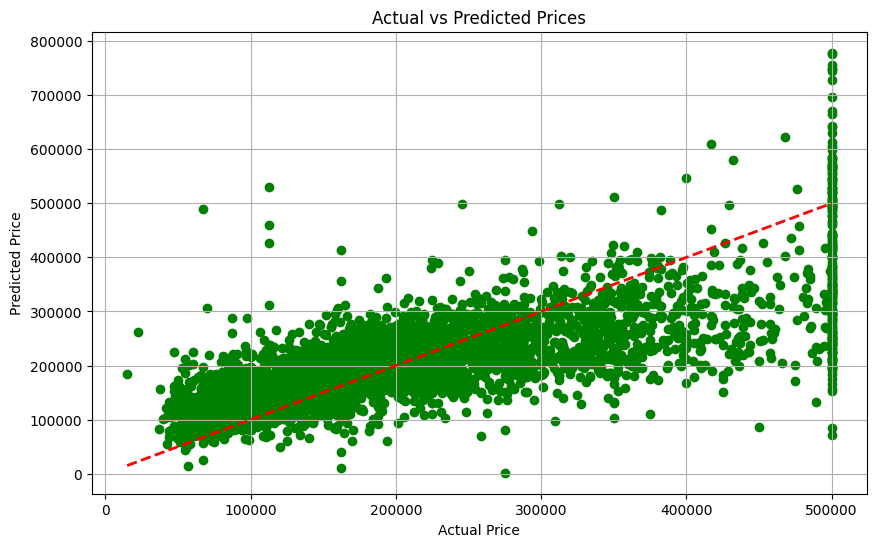

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


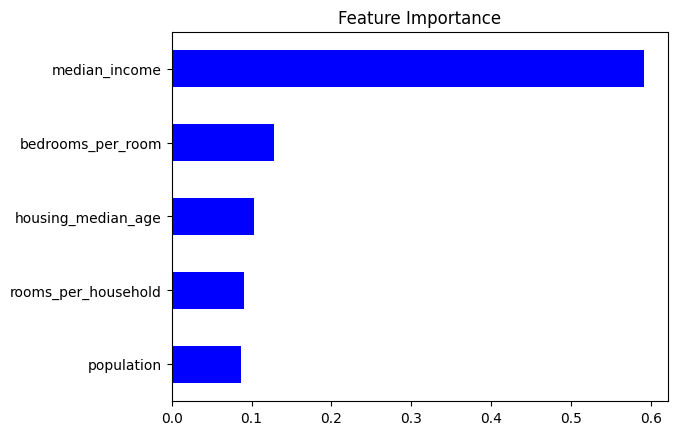

In [37]:
importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', color='blue')
plt.title("Feature Importance")
plt.show()

### 7. Summary output

In [38]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)

print("\nIntercept:", model.intercept_)



Model Coefficients:
                       Coefficient
housing_median_age     1647.760242
median_income         52450.734650
rooms_per_household     639.588307
bedrooms_per_room    515966.153784
population                1.457476

Intercept: -159034.1507129389


### 8. details


## Summary of the Housing Dataset

This dataset contains information about housing in California districts, including geographical data, house value, and demographic features.



### 9.1 Key Columns:

- `longitude`, `latitude`: Geographic coordinates.
- `housing_median_age`: Median age of houses in the district.
- `total_rooms`: Total number of rooms in all houses.
- `total_bedrooms`: Total number of bedrooms.
- `population`: Total population in the district.
- `households`: Total number of households.
- `median_income`: Median income of households.
- `median_house_value`: Median value of houses (Target variable).

### 9.2 Objectives:

- Perform Exploratory Data Analysis (EDA)
- Clean and engineer features from the dataset
- Train regression models (Linear Regression, Random Forest)
- Evaluate model performance using RMSE and R² score
- Visualize key insights


## 10. Common Questions & Answers 
### mostly asked Q&A


**Q1: What is the target variable?**  
A1: The target variable is `median_house_value` which we aim to predict.

**Q2: Are there missing values in the dataset?**  
A2: Yes, the `total_bedrooms` column has some missing values, which need to be handled.

**Q3: What kind of machine learning problem is this?**  
A3: This is a supervised regression problem.

**Q4: What are the most important features?**  
A4: Based on feature engineering and Random Forest importance, the top features include:

- `median_income`
- `rooms_per_household`
- `bedrooms_per_room`
- `housing_median_age`

**Q5: How accurate are the models?**  
A5: Accuracy is measured using RMSE and R². Random Forest usually performs better than Linear Regression in this context.

**Q6: Is the data ready for deep learning models?**  
A6: While it can be used, deep learning may be overkill due to the small number of features and rows. Simpler models perform well.

**Q7: Can this dataset be used for classification?**  
A7: If we convert house prices into categories (e.g., low, medium, high), then yes, it can be used for classification tasks.


### 11. About me 

Name :- Wasiq Ali yasir

github link click [here](https://github.com/WasiqAli275)

facebook link click [here](https://www.facebook.com/profile.php?id=100092751110055)